In [15]:
import glob
import numpy as np
from astropy.io import fits
import pandas as pd
from astropy.stats import LombScargle

import sys
terminalpythonpath=['', '/home/szabopal/PycharmProjects/venv36/lib/python36.zip', '/home/szabopal/PycharmProjects/venv36/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/site-packages']
[sys.path.append(each) for each in terminalpythonpath]
import matplotlib.pyplot as plt

In [16]:
def massAAPreader(ID, campaign):
    
    try:

        #lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc');
        lcfile=glob.glob('../../GO*/ktwo'+str(ID)+'-c'+campaign+'_lpd-targ.fits_massAAP_lc_TH8_k2sc.lc')[0]

       # if len(lcfile)==0:
       #     massAAP_k2sc_corr_flux = massAAP(each,True)
       #     lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc')

        #print(lcfile)
        lc=np.genfromtxt(lcfile,delimiter=' ',skip_header=1)
        massAAPreader.lc=lc
        bjd=lc[:,0]
        flux=lc[:,1]

        
        return bjd, flux
    
    except IndexError:
        
        return False, False

In [17]:
GO6082targets=glob.glob('../../GO6082/*c06*lpd*targ.fits')
GO8037targets=glob.glob('../../GO8037/*c08*lpd*targ.fits')
GO10037_1_targets=glob.glob('../../GO10037/*c101*lpd*targ.fits')
GO10037_2_targets=glob.glob('../../GO10037/*c102*lpd*targ.fits')
GO12111targets=glob.glob('../../GO12111/*c12*lpd*targ.fits')
GO13111targets=glob.glob('../../GO13111/*c13*lpd*targ.fits')
GO14058targets=glob.glob('../../GO14058/*c14*lpd*targ.fits')
GO15058targets=glob.glob('../../GO15058/*c15*lpd*targ.fits')
GO16058targets=glob.glob('../../GO16058/*c16*lpd*targ.fits')
GO17033targets=glob.glob('../../GO17033/*c17*lpd*targ.fits')
GO18033targets=glob.glob('../../GO18033/*c18*lpd*targ.fits')

In [18]:
targetlist=(
GO6082targets+
GO8037targets+
#GO10037_1_targets+
GO10037_2_targets+
GO12111targets+
GO13111targets+
GO14058targets+
GO15058targets+
GO16058targets+
GO17033targets+
GO18033targets)

In [19]:
df=pd.read_csv('kp_mag_search.csv')

class star:
    def __init__(self, ID, campaign):
        
        self.ID=ID
        self.campaign=campaign
        self.massaapbjd, self.massaapflux = massAAPreader(self.ID, self.campaign)


In [20]:
for index, each in enumerate(targetlist):
    
    if index==0:

        ID=each.split('/')[-1].split('-')[0][4:]
        campaign=each.split('/')[-1].split('-')[1].split('_')[0][1:]

        ourstar=star(ID,campaign)

In [103]:
ourstar.massaapbjd

array([2384.46326347, 2384.48369574, 2384.50412811, ..., 2463.33010978,
       2463.35054164, 2463.3709735 ])

In [104]:
frequency, power = LombScargle(ourstar.massaapbjd, ourstar.massaapflux).autopower(
    normalization='psd',nyquist_factor=1.2)

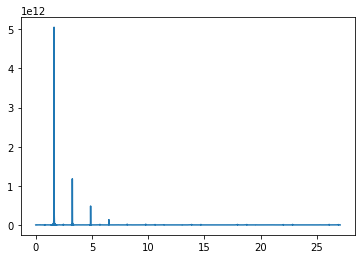

In [105]:
plt.plot(frequency,power)

In [106]:
frequency[power==max(power)]

array([1.62595011])

In [107]:
#ampli = (power * (frequency[1]-frequency[0]))**0.5

In [108]:
ampli = (power * (max(frequency)-min(frequency))/len(frequency))**0.5

In [109]:
sinfit = (ampli[ampli==max(ampli)])*np.sin(ourstar.massaapbjd*2*np.pi*frequency[ampli==max(ampli)])

(2400, 2410)

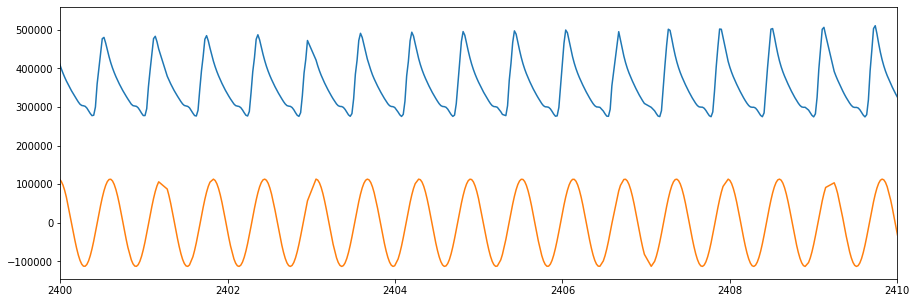

In [110]:
plt.figure(figsize=(15,5))
plt.plot(ourstar.massaapbjd,ourstar.massaapflux)
plt.plot(ourstar.massaapbjd,sinfit)
plt.xlim([2400,2410])

In [ ]:
best_frequency = frequency[np.argmax(power)]
t_fit = np.linspace(0, 1)
y_fit = LombScargle(t, y, dy).model(t_fit, best_frequency)